In [2]:
import os

from dtscalibration import read_silixa_files
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filepath = ''

ds_ = read_silixa_files(
    directory=filepath,
    timezone_netcdf='UTC',
    file_ext='*.xml')

ds = ds_.sel(x=slice(0, 628.2))  # only calibrate parts of the fiber


sections = {
    'probe1Temperature': [slice(130., 158.)],  # temp isolator
    }
ds.sections = sections

3 files were found, each representing a single timestep
6 recorded vars were found: LAF, ST, AST, REV-ST, REV-AST, TMP
Recorded at 3553 points along the cable
The measurement is double ended
Reading the data from disk


/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/io.py:1834: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  for k, v in coords_zip}


<IPython.core.display.Javascript object>


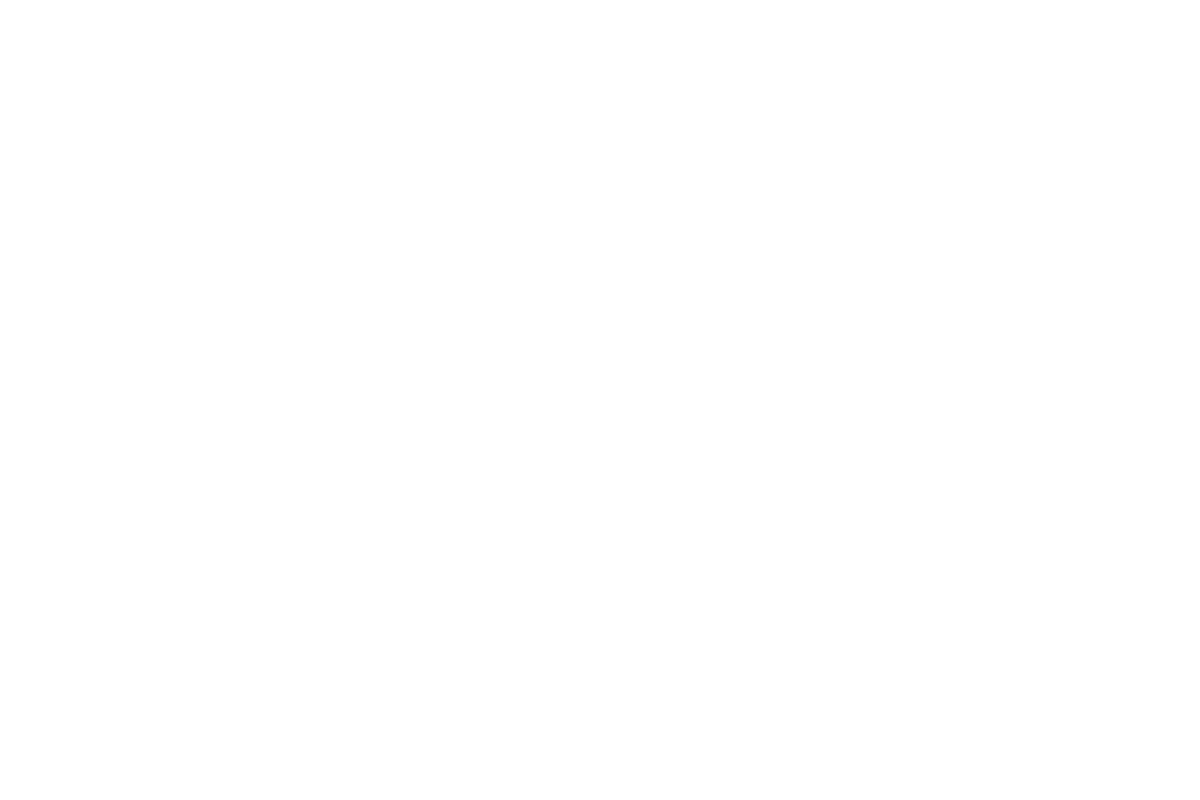

I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']
I dont know what to do with the following data ['tmp']
<xarray.DataArray 'x' (x: 2471)>
array([1.33000e-01, 3.88000e-01, 6.42000e-01, ..., 6.27497e+02, 6.27751e+02,
       6.28006e+02])
Coordinates:
  * x        (x) float64 0.133 0.388 0.642 0.896 ... 627.2 627.5 627.8 628.0
Attributes:
    name:              distance
    description:       Length along fiber
    long_description:  Starting at connector of forward channel
    units:             m 


 <xarray.DataArray 'x' (x: 2469)>
array([1.33000e-01, 3.88000e-01, 6.42000e-01, ..., 6.26989e+02, 6.27243e+02,
       6.27497e+02])
Coordinates:
  * x        (x) float64 0.133 0.388 0.642 0.896 ... 626.7 627.0 627.2 627.5
Attributes:
    name:              distance
    description:       Length along fiber
    long_description:  Starting at connector of forward channel
    units:             m


In [4]:
import os
from dtscalibration import read_silixa_files
from dtscalibration.datastore_utils import suggest_cable_shift_double_ended, shift_double_ended
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


suggested_shift = suggest_cable_shift_double_ended(
    ds,
    np.arange(-5, 5),
    plot_result=True,
    figsize=(12,8))

ds_restored = shift_double_ended(ds, suggested_shift[0])

print(ds.x, 3*'\n', ds_restored.x)


In [11]:
%matplotlib inline

matching_sections = [
    (slice(130., 158.), slice(470.5, 498.75), False)
]
sections = {
    'probe1Temperature': [slice(130., 158.), slice(470., 500.)]
    }
ds_.sections = sections
st_var, resid = ds.variance_stokes(st_label='st')
ast_var, _ = ds.variance_stokes(st_label='ast')
rst_var, _ = ds.variance_stokes(st_label='rst')
rast_var, _ = ds.variance_stokes(st_label='rast')

ds.calibration_double_ended(
    st_var=st_var,
    ast_var=ast_var,
    rst_var=rst_var,
    rast_var=rast_var,
    trans_att=[314.25],
    matching_sections=matching_sections,
    store_tmpw='tmpw',
    method='wls',
    solver='sparse')

ds_.calibration_double_ended(
    st_var=st_var,
    ast_var=ast_var,
    rst_var=rst_var,
    rast_var=rast_var,
    store_tmpw='tmpw',
    method='wls',
    solver='sparse')




/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/xarray/core/computation.py:733: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3182: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15
/home/jmanos/miniconda3/envs/comcat/lib/python3.7/site-packages/dtscalibration/datastore.py:3195: RuntimeWarning: invalid value encountered in log
  + ta_arr) - 273.15


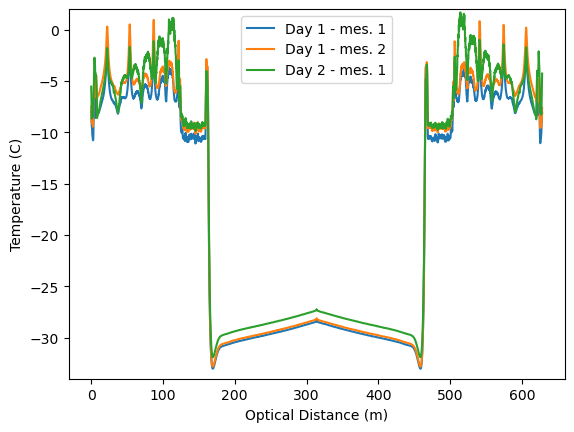

In [12]:
#%matplotlib notebook

fig, ax = plt.subplots()
#plt.style.use('dark_background')
ax.plot(ds.x, ds.isel(time=0).tmpw, label = 'Day 1 - mes. 1')
ax.plot(ds.x, ds.isel(time=1).tmpw, label = 'Day 1 - mes. 2')
ax.plot(ds.x, ds.isel(time=2).tmpw, label = 'Day 2 - mes. 1')

ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Optical Distance (m)')
#plt.xlim([0, 628])
plt.ylim([-34,2])
plt.legend()

#fig.savefig('DTS_borehole_mes_AllanHills.png', dpi=600)

In [13]:
#OK now we are calibrated so lets try and merge them assuming that the temperature doesn't change

<IPython.core.display.Javascript object>


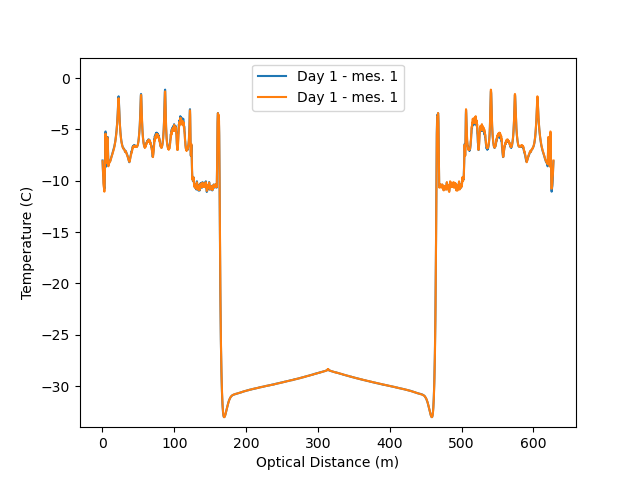

In [14]:
%matplotlib notebook

fig, ax = plt.subplots()
#plt.style.use('dark_background')
ax.plot(ds.x, ds.isel(time=0).tmpw, label = 'Day 1 - mes. 1')

# ax.plot(ds.x, ds.isel(time=1).tmpw, label = 'Day 1 - mes. 2')
# ax.plot(ds.x, ds.isel(time=2).tmpw, label = 'Day 2 - mes. 1')

ax.plot(ds.x, ds.isel(time=0).tmpw[::-1], label = 'Day 1 - mes. 1')

ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Optical Distance (m)')
#plt.xlim([0, 628])
plt.ylim([-34,2])
plt.legend()


In [15]:
mean_sig1 = (ds.isel(time=0).tmpw + ds.isel(time=0).tmpw[::-1])/2
mean_sig2 = (ds.isel(time=1).tmpw + ds.isel(time=1).tmpw[::-1])/2
mean_sig3 = (ds.isel(time=2).tmpw + ds.isel(time=2).tmpw[::-1])/2

<IPython.core.display.Javascript object>


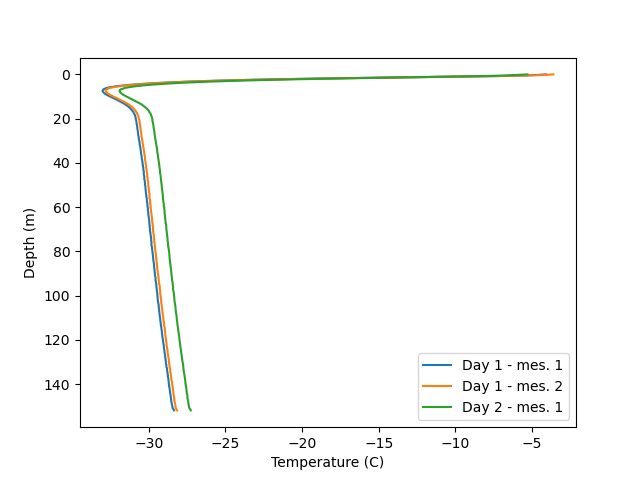

In [17]:
%matplotlib notebook

fig, ax = plt.subplots()
#plt.style.use('dark_background')
ax.plot(mean_sig1.sel(x=slice(162,314)), ds.sel(x=slice(162,314)).x-162, label = 'Day 1 - mes. 1')
ax.plot(mean_sig2.sel(x=slice(162,314)), ds.sel(x=slice(162,314)).x-162, label = 'Day 1 - mes. 2')
ax.plot(mean_sig3.sel(x=slice(162,314)), ds.sel(x=slice(162,314)).x-162, label = 'Day 2 - mes. 1')

ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Depth (m)')

plt.gca().invert_yaxis()


plt.legend()

#fig.savefig('depth_temp_fig.png', dpi=600)

In [18]:
mean_tot = (mean_sig1 + mean_sig2 + mean_sig3) / 3

<IPython.core.display.Javascript object>


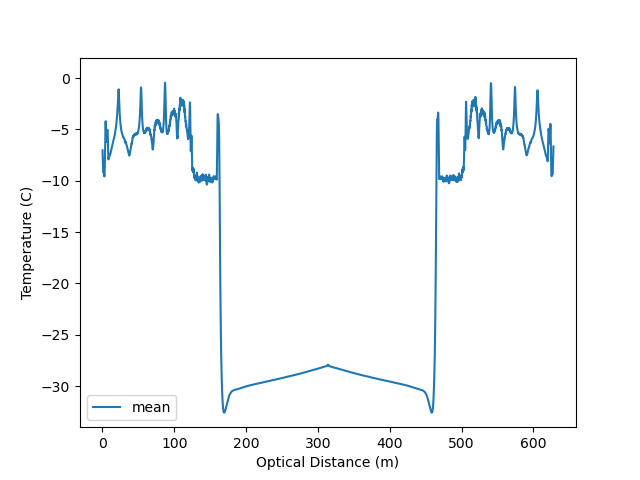

In [19]:
%matplotlib notebook

fig, ax = plt.subplots()
#plt.style.use('dark_background')
ax.plot(ds.x, mean_tot, label = 'mean')


ax.set_ylabel('Temperature (C)')
ax.set_xlabel('Optical Distance (m)')
#plt.xlim([0, 628])
plt.ylim([-34,2])
plt.legend()

In [20]:
#Now lets detrend the geothermal flux signal

<IPython.core.display.Javascript object>


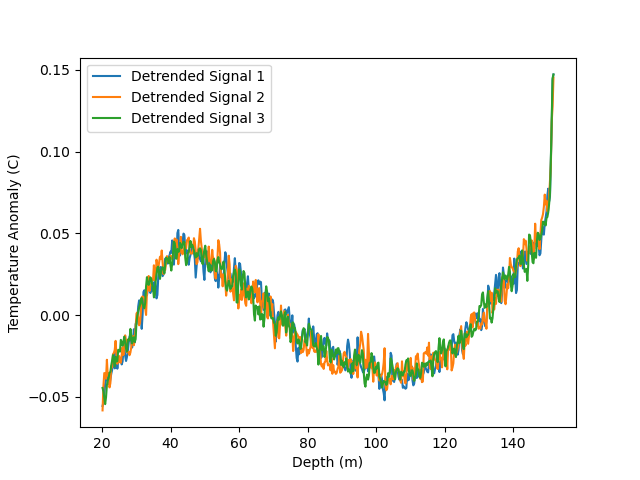

In [21]:
import scipy

detrend1 = scipy.signal.detrend(mean_sig1.sel(x=slice(182,314)), type='linear', bp=0, overwrite_data=False)
detrend2 = scipy.signal.detrend(mean_sig2.sel(x=slice(182,314)), type='linear', bp=0, overwrite_data=False)
detrend3 = scipy.signal.detrend(mean_sig3.sel(x=slice(182,314)), type='linear', bp=0, overwrite_data=False)

%matplotlib notebook

fig, ax = plt.subplots()
#plt.style.use('dark_background')
ax.plot(ds.sel(x=slice(182,314)).x-162, detrend1, label = 'Detrended Signal 1')
ax.plot(ds.sel(x=slice(182,314)).x-162, detrend2, label = 'Detrended Signal 2')
ax.plot(ds.sel(x=slice(182,314)).x-162, detrend3, label = 'Detrended Signal 3')

ax.set_ylabel('Temperature Anomaly (C)')
ax.set_xlabel('Depth (m)')
#plt.xlim([0, 628])
#plt.ylim([-34,2])
plt.legend()

#plt.savefig('detreneded_signal.png', dpi=600)

<IPython.core.display.Javascript object>


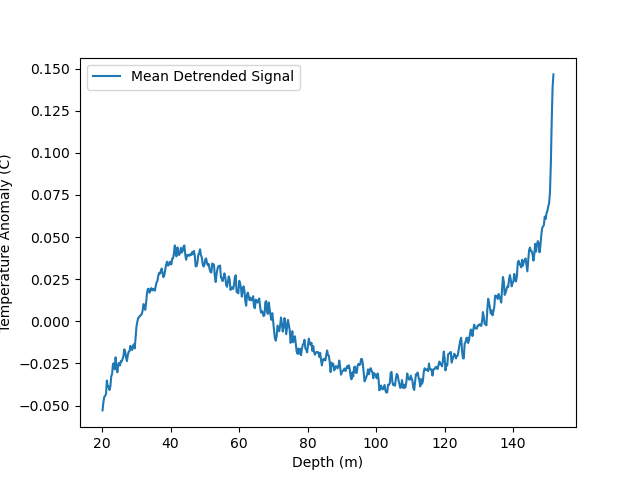

In [22]:
#mean detrended

mean_detrend = (detrend1 + detrend2 + detrend3) / 3

%matplotlib notebook

fig, ax = plt.subplots()
#plt.style.use('dark_background')
ax.plot(ds.sel(x=slice(182,314)).x-162, mean_detrend, label = 'Mean Detrended Signal')

ax.set_ylabel('Temperature Anomaly (C)')
ax.set_xlabel('Depth (m)')
#plt.xlim([0, 628])
#plt.ylim([-34,2])
plt.legend()

#plt.savefig('mean_detreneded_signal.png', dpi=600)

In [23]:
#Can we filter the long period signal??

<IPython.core.display.Javascript object>


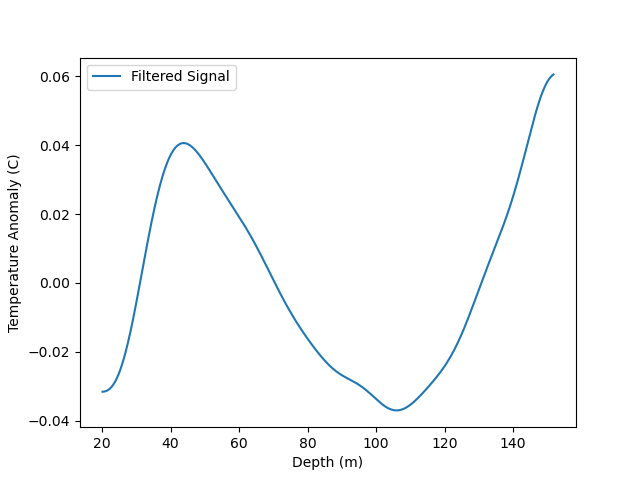

In [24]:
from scipy import signal

b, a = signal.ellip(4, 0.01, 120, 0.020) 
fgust = signal.filtfilt(b, a, mean_detrend, method="gust")


%matplotlib notebook

fig, ax = plt.subplots()
#plt.style.use('dark_background')
ax.plot(ds.sel(x=slice(182,314)).x-162, fgust, label = 'Filtered Signal')

ax.set_ylabel('Temperature Anomaly (C)')
ax.set_xlabel('Depth (m)')
#plt.xlim([0, 628])
#plt.ylim([-34,2])
plt.legend()

#fig.savefig('filtered_signal_fig.png', dpi=600)


In [25]:
#Comparison to thermistor

In [26]:
## Thermistor ##

import pandas as pd

thermistor = pd.read_csv('Temp Logging Data Allan Hills.csv')
print(thermistor)

    Temp (23-Dec)  Temp (07-Jan)   Depth
0          -17.06         -14.04    0.35
1          -33.23         -31.83    5.00
2          -33.63         -33.61   10.00
3          -32.55         -32.61   15.00
4          -32.20         -32.27   20.00
5          -32.09         -32.07   25.00
6          -31.96         -32.03   30.00
7          -31.76            NaN   40.00
8          -31.60         -31.59   50.00
9          -31.44            NaN   60.00
10         -31.28         -31.34   70.00
11         -31.12            NaN   80.00
12         -30.94         -30.96   90.00
13         -30.76            NaN  100.00
14         -30.58         -30.64  110.00
15         -30.38            NaN  120.00
16         -30.18         -30.21  130.00
17         -29.98         -30.02  140.00
18         -29.86         -29.90  148.75


<IPython.core.display.Javascript object>


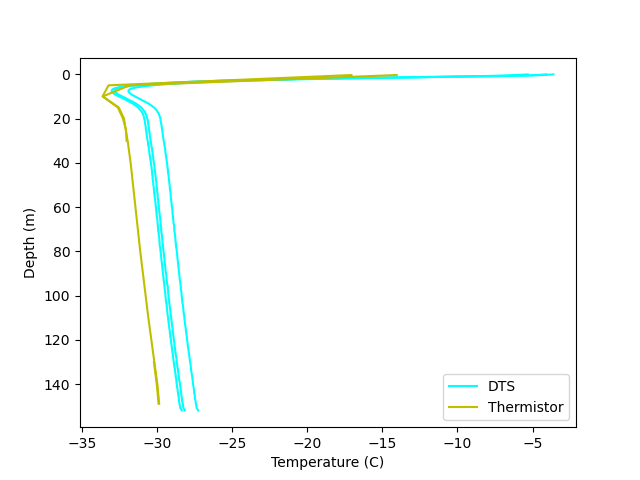

In [27]:
%matplotlib notebook

fig, ax = plt.subplots()
#plt.style.use('dark_background')
ax.plot(mean_sig1.sel(x=slice(162,314)), ds.sel(x=slice(162,314)).x-162, label = 'DTS', c='cyan')
ax.plot(mean_sig2.sel(x=slice(162,314)), ds.sel(x=slice(162,314)).x-162, c='cyan')
ax.plot(mean_sig3.sel(x=slice(162,314)), ds.sel(x=slice(162,314)).x-162, c='cyan')

ax.plot(thermistor['Temp (23-Dec)'], thermistor['Depth'], label = 'Thermistor',c= 'y')
ax.plot(thermistor['Temp (07-Jan)'], thermistor['Depth'],c= 'y')

ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Depth (m)')

plt.gca().invert_yaxis()


plt.legend()

fig.savefig('DTS_thermistor_compare_raw.png', dpi=600)

In [28]:
#Detrending the thermistor data

<IPython.core.display.Javascript object>


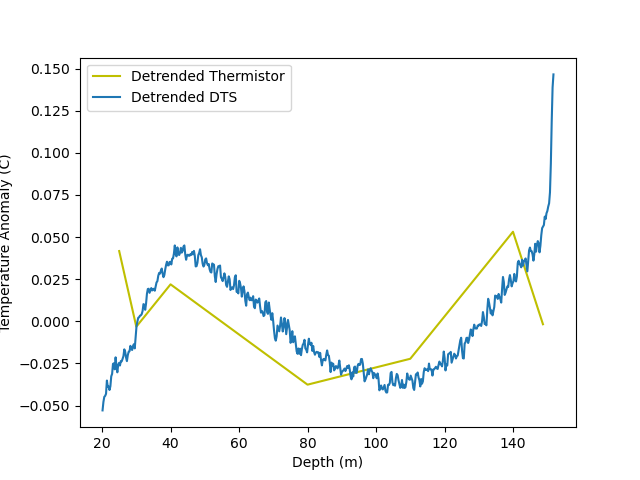

In [29]:
detrend_therm = scipy.signal.detrend(thermistor['Temp (23-Dec)'].to_numpy()[5:], type='linear', bp=0, overwrite_data=False)

%matplotlib notebook
                                     
fig, ax = plt.subplots()
#plt.style.use('dark_background')


ax.plot(thermistor['Depth'].to_numpy()[5:], detrend_therm, label = 'Detrended Thermistor',c= 'y')
ax.plot(ds.sel(x=slice(182,314)).x-162, mean_detrend, label = 'Detrended DTS')

ax.set_ylabel('Temperature Anomaly (C)')
ax.set_xlabel('Depth (m)')



plt.legend()

#fig.savefig('DTS_thermistor_compare_anomaly.png', dpi=600)

In [30]:
#What's the geothermal heat flux at the bed??

<IPython.core.display.Javascript object>


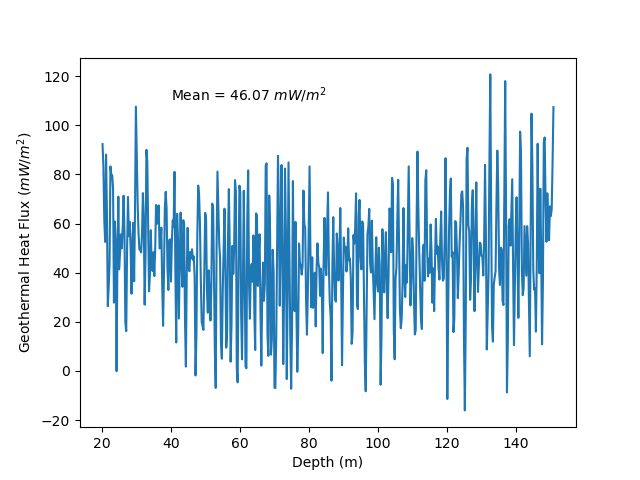

In [31]:
gradient = np.gradient(mean_tot.sel(x=slice(182,313)),.255)
mean_gradient = np.mean(gradient)
q = gradient * 2.5*1e3
mean_q = np.mean(q)


%matplotlib notebook
                                     
fig, ax = plt.subplots()
#plt.style.use('dark_background')


ax.plot(ds.sel(x=slice(182,313)).x-162, gradient*2.5*1e3)

ax.set_ylabel('Geothermal Heat Flux ($mW/m^2$)')
ax.set_xlabel('Depth (m)')

ax.annotate('Mean = {} $mW/m^2$'.format(round(mean_q, 2)),(40,110))

plt.show()
#plt.legend()

#fig.savefig('geothermal_heat_flux.png', dpi=600)

<IPython.core.display.Javascript object>


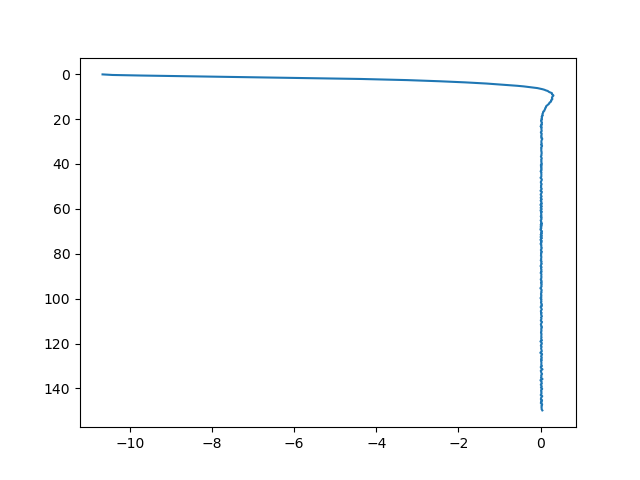

In [32]:
gradient = np.gradient(mean_tot.sel(x=slice(163,313)),.255)

%matplotlib notebook
                                     
fig, ax = plt.subplots()
#plt.style.use('dark_background')
plt.gca().invert_yaxis()

ax.plot(gradient, ds.sel(x=slice(163,313)).x-163)

<IPython.core.display.Javascript object>


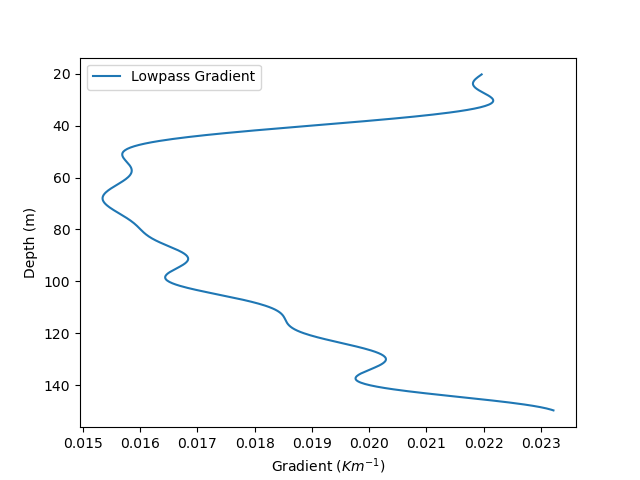

In [33]:
gradient_borehole = np.gradient(mean_tot.sel(x=slice(183,313)),.255)

b, a = signal.ellip(4, 0.01, 120, 0.020) 
fgust_grad = signal.filtfilt(b, a, gradient_borehole, method="gust")
%matplotlib notebook
                                     
fig, ax = plt.subplots()
#plt.style.use('dark_background')
plt.gca().invert_yaxis()

ax.plot(fgust_grad, ds.sel(x=slice(183,313)).x-163, label='Lowpass Gradient')

ax.set_xlabel('Gradient ($Km^{-1})$')
ax.set_ylabel('Depth (m)')
plt.legend()

In [34]:
#Steady state glacier solution
#Import the ice temperature model and relevant constants
from iceotherm.lib.numerical_model import ice_temperature
from iceotherm.lib.analytical_solutions import Robin_T, Rezvan_T, Meyer_T, Perol_T
from iceotherm.lib.ice_properties import conductivity, heat_capacity, rate_factor
from iceotherm.lib.constants import constants
const = constants()

<IPython.core.display.Javascript object>


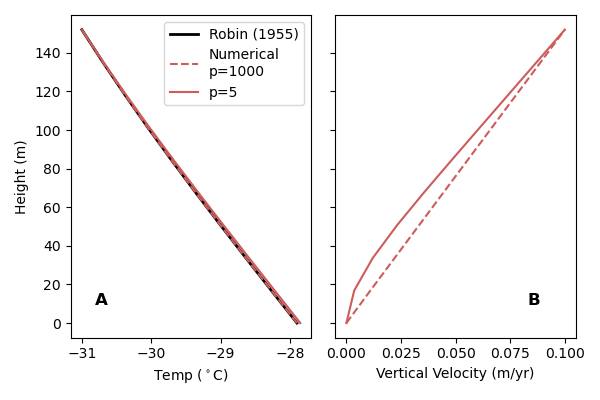

Running model to steady state
.
Running model to steady state
.


In [35]:
# Initialize the model class
m = ice_temperature(Ts=-31., H=152.,qgeo=0.046, dS=0., nz=10)
m.initial_conditions()
m.source_terms()
m.stencil(dt=1.*const.spy)

# Initialize the figure
plt.figure(figsize=(6,4))
ax1 = plt.subplot(121)
ax1.set_ylabel('Height (m)')
ax1.set_xlabel('Temp ($^\circ$C)')
plt.text(.1,.1,'A',transform=ax1.transAxes,fontweight='bold',fontsize=12)
ax2 = plt.subplot(122)
ax2.tick_params(labelleft=False)
ax2.set_xlabel('Vertical Velocity (m/yr)')
plt.text(.8,.1,'B',transform=ax2.transAxes,fontweight='bold',fontsize=12)
plt.tight_layout()

# Run and plot the analytical solution
TR,Mrate = Robin_T(m)
ax1.plot(TR,m.z,'k-',lw=2,label='Robin (1955)')
# Run and plot the numerical solution in the case of a linear vertical velocity profile (p=1000)
m.numerical_to_steady_state()
ax1.plot(m.T,m.z,'--',c='indianred',label='Numerical\np=1000')
# Plot the vertical velocity profile
ax2.plot(m.v_z*const.spy,m.z,'--',c='indianred')

# As a comparison, use a more divide-like vertical velocity profile
m.p = 5.
m.initial_conditions()
m.source_terms()
m.stencil(dt=1.*const.spy)

# Run and plot the numerical solution
m.numerical_to_steady_state()
ax1.plot(m.T,m.z,'-',c='indianred',label='p=%.0f'%m.p)
ax2.plot(m.v_z*const.spy,m.z,'-',c='indianred')

# Figure output
ax1.legend()
plt.tight_layout()
#plt.savefig('Robin_reproduce_analytical.png',dpi=300)

<IPython.core.display.Javascript object>


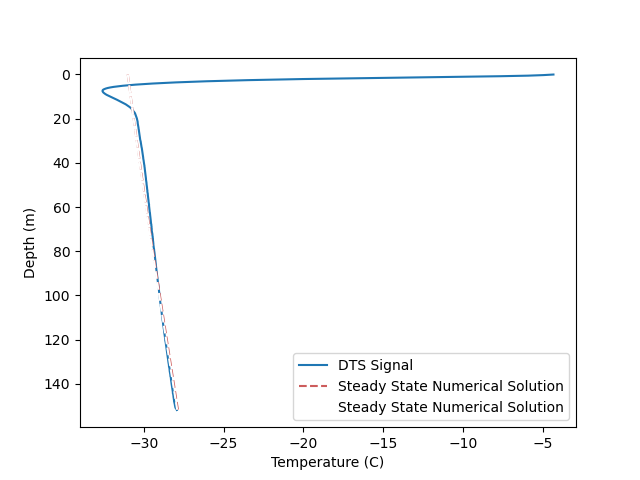

Text(0.5, 0, 'Temperature (C)')

In [36]:
%matplotlib notebook

fig, ax = plt.subplots()
#plt.style.use('dark_background')

ax.plot(mean_tot.sel(x=slice(162,314)), ds.sel(x=slice(162,314)).x-162, label = 'DTS Signal')
ax.plot(m.T[::-1],m.z,'--',c='indianred',label='Steady State Numerical Solution')
ax.plot(TR[::-1],m.z,'--',c='white',label='Steady State Numerical Solution')

plt.gca().invert_yaxis()
plt.legend()
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Temperature (C)')

In [37]:
## Thermistor all sites ##

import pandas as pd

thermistor_all = pd.read_csv('Temp Logging Data Allan Hills All Sites.csv')
print(thermistor_all)

    CMC1 Temp (23-Dec)  CMC1 Temp (07-Jan)  CMC2 Temp  AH2201 Temp (24-Dec)  \
0               -17.06              -14.04     -18.28                -15.90   
1               -33.23              -31.83     -32.86                -31.54   
2               -33.63              -33.61     -33.92                -32.82   
3               -32.55              -32.61     -33.17                -31.93   
4               -32.20              -32.27     -32.78                -31.76   
5               -32.09              -32.07        NaN                -31.80   
6               -31.96              -32.03        NaN                -31.81   
7               -31.76                 NaN        NaN                -31.77   
8               -31.60              -31.59     -32.54                -31.68   
9               -31.44                 NaN        NaN                -31.59   
10              -31.28              -31.34        NaN                -31.47   
11              -31.12                 NaN     -32.1

<IPython.core.display.Javascript object>


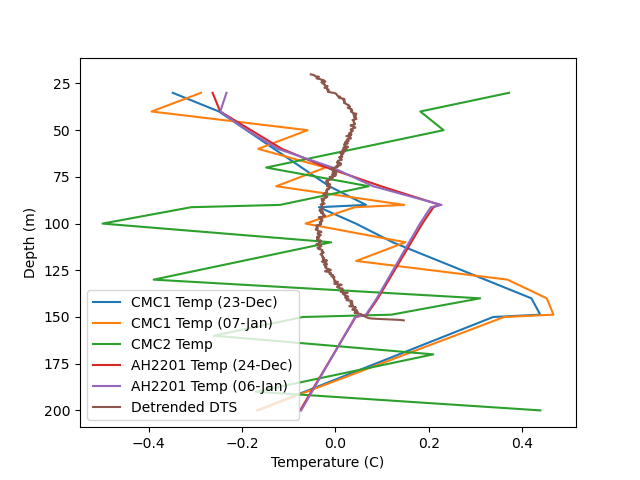

In [38]:
#Lets check all thermistors for that sinusoidal temperature variations
import scipy
%matplotlib notebook
                                     
fig, ax = plt.subplots()
#plt.style.use('dark_background')

for i in thermistor_all.head():
    if i == 'Depth':
        break
    else:
        
        filled = thermistor_all[i].fillna(method='ffill', axis=0, inplace=False)
        detrend = scipy.signal.detrend(filled[6:], type='linear', bp=0, overwrite_data=False)

        ax.plot(detrend, thermistor_all['Depth'][6:], label=i)

ax.plot(mean_detrend, ds.sel(x=slice(182,314)).x-162, label = 'Detrended DTS')
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Depth (m)')

ax.invert_yaxis()

plt.legend()

In [39]:
# #horizontal velocity estimation

# theta = 45 * np.pi / 180. #radians
# n = 3
# u_0 = -0.015 #m/yr
# u_bed = 0 #m/yr
# rho = 900 
# R = 8.3142e3
# Q = 60e3
# g = 9.8 #m/s^2
# h = mean_tot.sel(x=slice(162,313)).x[-1] - mean_tot.sel(x=slice(162,313)).x[0]
# A_0 = 2.4e-18

# y = np.arange(mean_tot.sel(x=slice(162,313)).x[0], mean_tot.sel(x=slice(162,313)).x[-1],step.values) - 182
# step = mean_tot.sel(x=slice(162,313)).x[1] - mean_tot.sel(x=slice(162,313)).x[0] 
# step = step.values#step distance in temperature measurements

# A = A_0 * np.exp(-Q / (R * (mean_tot.sel(x=slice(162,313)) + 273.15)))

# vel = []

# for i,j in zip(A.values,y):
#     u = - (.5*i*((rho*g)**n)*((np.sin(theta))**(n)) *((h**(n+1) - j**(n+1)))  / (n+1))
#     vel.append(u.values)
    
# vel = np.asarray(vel)

# %matplotlib notebook
                                     
# fig, ax = plt.subplots()
# ax.plot(vel)

In [53]:
top_trend = 182 #optical distance (m), This is what we think the start of the long term signal is.
bottom_trend = 312.5 #optical distance (m), This is the bottom of the trend just above the warm bottom anomaly..
start_of_borehole = 162 #optical distance (m), Top of the borehole.

array([-8.02081094, -8.48250711, -9.01487009, ..., -8.8297545 ,
       -8.49127077, -8.09484538])

In [67]:
f0 = ds.isel(time=0).tmpw
r0 = ds.isel(time=0).tmpw[::-1]
f1 = ds.isel(time=1).tmpw
r1 = ds.isel(time=1).tmpw[::-1]
f2 = ds.isel(time=2).tmpw
r2 = ds.isel(time=2).tmpw[::-1]

all_mes = [f0,r0,f1,r1,f2,r2]

<IPython.core.display.Javascript object>


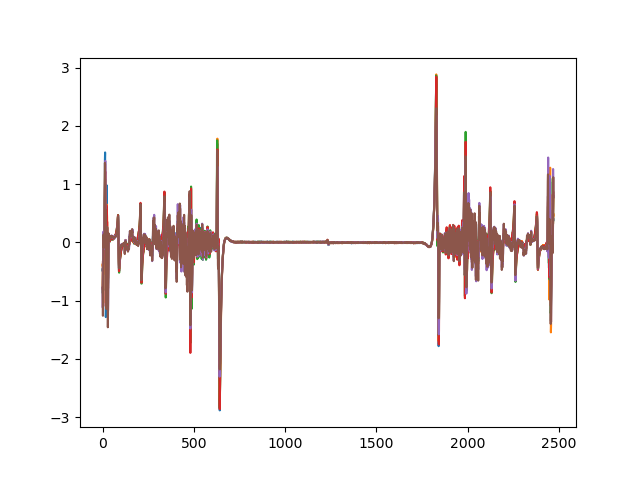

In [68]:
fig, ax = plt.subplots()
for i in all_mes:
    ax.plot(np.gradient(i))

In [98]:
gradients_all = np.gradient(all_mes, axis=1).T
gradients_under = np.gradient(all_mes, axis=1).T[720:1230] #under seasonal signal
gradient_mean = np.mean(gradients_all, axis = 1)
gradient_tot = np.mean(gradients_all)

In [180]:
np.mean(mean_all[0:20])

-7.7063214292593285

In [201]:
buffer = 20
window_size = 2 * buffer

gradients_mean_rolling = np.zeros(len(gradients_all)+window_size)

just_mean_rolling = np.zeros(len(mean_all)-window_size)

for i in range(len(gradients_all)):
    gradients_mean_rolling[i+buffer] = np.mean(gradients_all[i:i+window_size,:])
    #print(gradients_all[i:i+window_size,:])
    
for i in range(len(just_mean_rolling)):
    just_mean_rolling[i] = np.mean(mean_all[i:i+window_size])
    #print(mean_all[i:i+window_size,:])

In [292]:
for k in all_mes:
    just_mean_rolling = np.zeros(len(k)-window_size)
    print(len(k))
    for i in range(len(just_mean_rolling)):
        arr = np.asarray(k)
        print(arr[i:i+window_size])

2471
[ -8.02081094  -8.48250711  -9.01487009  -9.36975663  -9.56914994
  -9.67834349 -10.20297908 -10.40661687 -10.50988435 -10.61299245
 -10.77657202 -10.74394622 -10.24580538  -9.06820175  -7.39985045
  -5.97916129  -5.21081765  -5.19353897  -6.40532884  -7.75803288
  -8.61682984  -8.58869607  -7.7109568   -6.62226781  -6.17068451
  -5.92952374  -5.93108025  -5.73749436  -5.72997958  -6.4612482
  -7.2587263   -8.02898725  -8.38786494  -8.33896902  -8.26679348
  -8.22438096  -8.22141596  -8.18453585  -8.16806123  -8.14511719]
[ -8.48250711  -9.01487009  -9.36975663  -9.56914994  -9.67834349
 -10.20297908 -10.40661687 -10.50988435 -10.61299245 -10.77657202
 -10.74394622 -10.24580538  -9.06820175  -7.39985045  -5.97916129
  -5.21081765  -5.19353897  -6.40532884  -7.75803288  -8.61682984
  -8.58869607  -7.7109568   -6.62226781  -6.17068451  -5.92952374
  -5.93108025  -5.73749436  -5.72997958  -6.4612482   -7.2587263
  -8.02898725  -8.38786494  -8.33896902  -8.26679348  -8.22438096
  -8.2

[-5.21081765 -5.19353897 -6.40532884 -7.75803288 -8.61682984 -8.58869607
 -7.7109568  -6.62226781 -6.17068451 -5.92952374 -5.93108025 -5.73749436
 -5.72997958 -6.4612482  -7.2587263  -8.02898725 -8.38786494 -8.33896902
 -8.26679348 -8.22438096 -8.22141596 -8.18453585 -8.16806123 -8.14511719
 -8.13171518 -8.0892783  -8.07209414 -7.9955548  -7.9429353  -7.88945795
 -7.84052906 -7.76771453 -7.69820162 -7.62101022 -7.58092923 -7.52901255
 -7.46574296 -7.40088603 -7.33900664 -7.27448967]
[-5.19353897 -6.40532884 -7.75803288 -8.61682984 -8.58869607 -7.7109568
 -6.62226781 -6.17068451 -5.92952374 -5.93108025 -5.73749436 -5.72997958
 -6.4612482  -7.2587263  -8.02898725 -8.38786494 -8.33896902 -8.26679348
 -8.22438096 -8.22141596 -8.18453585 -8.16806123 -8.14511719 -8.13171518
 -8.0892783  -8.07209414 -7.9955548  -7.9429353  -7.88945795 -7.84052906
 -7.76771453 -7.69820162 -7.62101022 -7.58092923 -7.52901255 -7.46574296
 -7.40088603 -7.33900664 -7.27448967 -7.2241101 ]
[-6.40532884 -7.75803288 

[-8.26679348 -8.22438096 -8.22141596 -8.18453585 -8.16806123 -8.14511719
 -8.13171518 -8.0892783  -8.07209414 -7.9955548  -7.9429353  -7.88945795
 -7.84052906 -7.76771453 -7.69820162 -7.62101022 -7.58092923 -7.52901255
 -7.46574296 -7.40088603 -7.33900664 -7.27448967 -7.2241101  -7.18589763
 -7.10536608 -7.04393919 -6.99576895 -6.92903174 -6.86592594 -6.80368311
 -6.7080537  -6.62044673 -6.53740551 -6.44777631 -6.33984335 -6.23722263
 -6.12462985 -6.00523555 -5.86154607 -5.74277831]
[-8.22438096 -8.22141596 -8.18453585 -8.16806123 -8.14511719 -8.13171518
 -8.0892783  -8.07209414 -7.9955548  -7.9429353  -7.88945795 -7.84052906
 -7.76771453 -7.69820162 -7.62101022 -7.58092923 -7.52901255 -7.46574296
 -7.40088603 -7.33900664 -7.27448967 -7.2241101  -7.18589763 -7.10536608
 -7.04393919 -6.99576895 -6.92903174 -6.86592594 -6.80368311 -6.7080537
 -6.62044673 -6.53740551 -6.44777631 -6.33984335 -6.23722263 -6.12462985
 -6.00523555 -5.86154607 -5.74277831 -5.59772975]
[-8.22141596 -8.18453585 

[-7.46574296 -7.40088603 -7.33900664 -7.27448967 -7.2241101  -7.18589763
 -7.10536608 -7.04393919 -6.99576895 -6.92903174 -6.86592594 -6.80368311
 -6.7080537  -6.62044673 -6.53740551 -6.44777631 -6.33984335 -6.23722263
 -6.12462985 -6.00523555 -5.86154607 -5.74277831 -5.59772975 -5.43195599
 -5.25348073 -5.0686084  -4.86994873 -4.63838682 -4.35627619 -4.07981449
 -3.7751606  -3.46644816 -3.06627263 -2.59499456 -2.13105771 -1.81728506
 -1.76862544 -2.00606457 -2.45311603 -2.94965924]
[-7.40088603 -7.33900664 -7.27448967 -7.2241101  -7.18589763 -7.10536608
 -7.04393919 -6.99576895 -6.92903174 -6.86592594 -6.80368311 -6.7080537
 -6.62044673 -6.53740551 -6.44777631 -6.33984335 -6.23722263 -6.12462985
 -6.00523555 -5.86154607 -5.74277831 -5.59772975 -5.43195599 -5.25348073
 -5.0686084  -4.86994873 -4.63838682 -4.35627619 -4.07981449 -3.7751606
 -3.46644816 -3.06627263 -2.59499456 -2.13105771 -1.81728506 -1.76862544
 -2.00606457 -2.45311603 -2.94965924 -3.43481137]
[-7.33900664 -7.27448967 -

[-6.12462985 -6.00523555 -5.86154607 -5.74277831 -5.59772975 -5.43195599
 -5.25348073 -5.0686084  -4.86994873 -4.63838682 -4.35627619 -4.07981449
 -3.7751606  -3.46644816 -3.06627263 -2.59499456 -2.13105771 -1.81728506
 -1.76862544 -2.00606457 -2.45311603 -2.94965924 -3.43481137 -3.83219117
 -4.20197856 -4.5038569  -4.79833069 -5.03759711 -5.27593791 -5.48663675
 -5.67808109 -5.82737552 -5.98180218 -6.09779674 -6.21811001 -6.31162226
 -6.41533415 -6.48644079 -6.55227842 -6.61880533]
[-6.00523555 -5.86154607 -5.74277831 -5.59772975 -5.43195599 -5.25348073
 -5.0686084  -4.86994873 -4.63838682 -4.35627619 -4.07981449 -3.7751606
 -3.46644816 -3.06627263 -2.59499456 -2.13105771 -1.81728506 -1.76862544
 -2.00606457 -2.45311603 -2.94965924 -3.43481137 -3.83219117 -4.20197856
 -4.5038569  -4.79833069 -5.03759711 -5.27593791 -5.48663675 -5.67808109
 -5.82737552 -5.98180218 -6.09779674 -6.21811001 -6.31162226 -6.41533415
 -6.48644079 -6.55227842 -6.61880533 -6.67421111]
[-5.86154607 -5.74277831 

[-1.76862544 -2.00606457 -2.45311603 -2.94965924 -3.43481137 -3.83219117
 -4.20197856 -4.5038569  -4.79833069 -5.03759711 -5.27593791 -5.48663675
 -5.67808109 -5.82737552 -5.98180218 -6.09779674 -6.21811001 -6.31162226
 -6.41533415 -6.48644079 -6.55227842 -6.61880533 -6.67421111 -6.73741773
 -6.75746076 -6.81475426 -6.81472852 -6.8696961  -6.86591313 -6.89926255
 -6.90258299 -6.93819485 -6.96942498 -7.0099035  -7.11416905 -7.16320501
 -7.19695938 -7.17053995 -7.15055554 -7.08705864]
[-2.00606457 -2.45311603 -2.94965924 -3.43481137 -3.83219117 -4.20197856
 -4.5038569  -4.79833069 -5.03759711 -5.27593791 -5.48663675 -5.67808109
 -5.82737552 -5.98180218 -6.09779674 -6.21811001 -6.31162226 -6.41533415
 -6.48644079 -6.55227842 -6.61880533 -6.67421111 -6.73741773 -6.75746076
 -6.81475426 -6.81472852 -6.8696961  -6.86591313 -6.89926255 -6.90258299
 -6.93819485 -6.96942498 -7.0099035  -7.11416905 -7.16320501 -7.19695938
 -7.17053995 -7.15055554 -7.08705864 -7.15855526]
[-2.45311603 -2.94965924

[-6.41533415 -6.48644079 -6.55227842 -6.61880533 -6.67421111 -6.73741773
 -6.75746076 -6.81475426 -6.81472852 -6.8696961  -6.86591313 -6.89926255
 -6.90258299 -6.93819485 -6.96942498 -7.0099035  -7.11416905 -7.16320501
 -7.19695938 -7.17053995 -7.15055554 -7.08705864 -7.15855526 -7.1713198
 -7.25184751 -7.28690652 -7.35234448 -7.37993655 -7.41437584 -7.48656495
 -7.50351898 -7.59316559 -7.61838694 -7.73475355 -7.76700109 -7.86496378
 -7.88784392 -7.97299505 -8.02696114 -8.11547086]
[-6.48644079 -6.55227842 -6.61880533 -6.67421111 -6.73741773 -6.75746076
 -6.81475426 -6.81472852 -6.8696961  -6.86591313 -6.89926255 -6.90258299
 -6.93819485 -6.96942498 -7.0099035  -7.11416905 -7.16320501 -7.19695938
 -7.17053995 -7.15055554 -7.08705864 -7.15855526 -7.1713198  -7.25184751
 -7.28690652 -7.35234448 -7.37993655 -7.41437584 -7.48656495 -7.50351898
 -7.59316559 -7.61838694 -7.73475355 -7.76700109 -7.86496378 -7.88784392
 -7.97299505 -8.02696114 -8.11547086 -8.18631344]
[-6.55227842 -6.61880533 

[-7.19695938 -7.17053995 -7.15055554 -7.08705864 -7.15855526 -7.1713198
 -7.25184751 -7.28690652 -7.35234448 -7.37993655 -7.41437584 -7.48656495
 -7.50351898 -7.59316559 -7.61838694 -7.73475355 -7.76700109 -7.86496378
 -7.88784392 -7.97299505 -8.02696114 -8.11547086 -8.18631344 -8.18920909
 -8.09431023 -7.97842931 -7.92308207 -7.78788031 -7.76347189 -7.59725698
 -7.55877036 -7.43747201 -7.3580899  -7.32622096 -7.16446736 -7.17787717
 -7.06484708 -7.07901982 -6.94851681 -6.88520343]
[-7.17053995 -7.15055554 -7.08705864 -7.15855526 -7.1713198  -7.25184751
 -7.28690652 -7.35234448 -7.37993655 -7.41437584 -7.48656495 -7.50351898
 -7.59316559 -7.61838694 -7.73475355 -7.76700109 -7.86496378 -7.88784392
 -7.97299505 -8.02696114 -8.11547086 -8.18631344 -8.18920909 -8.09431023
 -7.97842931 -7.92308207 -7.78788031 -7.76347189 -7.59725698 -7.55877036
 -7.43747201 -7.3580899  -7.32622096 -7.16446736 -7.17787717 -7.06484708
 -7.07901982 -6.94851681 -6.88520343 -6.78220257]
[-7.15055554 -7.08705864 

[-7.88784392 -7.97299505 -8.02696114 -8.11547086 -8.18631344 -8.18920909
 -8.09431023 -7.97842931 -7.92308207 -7.78788031 -7.76347189 -7.59725698
 -7.55877036 -7.43747201 -7.3580899  -7.32622096 -7.16446736 -7.17787717
 -7.06484708 -7.07901982 -6.94851681 -6.88520343 -6.78220257 -6.67840133
 -6.71981708 -6.61733975 -6.67960279 -6.58233162 -6.64032062 -6.56024394
 -6.55406711 -6.59083057 -6.57018899 -6.6393985  -6.57843865 -6.62801523
 -6.56678386 -6.61098267 -6.59683411 -6.60534195]
[-7.97299505 -8.02696114 -8.11547086 -8.18631344 -8.18920909 -8.09431023
 -7.97842931 -7.92308207 -7.78788031 -7.76347189 -7.59725698 -7.55877036
 -7.43747201 -7.3580899  -7.32622096 -7.16446736 -7.17787717 -7.06484708
 -7.07901982 -6.94851681 -6.88520343 -6.78220257 -6.67840133 -6.71981708
 -6.61733975 -6.67960279 -6.58233162 -6.64032062 -6.56024394 -6.55406711
 -6.59083057 -6.57018899 -6.6393985  -6.57843865 -6.62801523 -6.56678386
 -6.61098267 -6.59683411 -6.60534195 -6.6339429 ]
[-8.02696114 -8.11547086

[-7.06484708 -7.07901982 -6.94851681 -6.88520343 -6.78220257 -6.67840133
 -6.71981708 -6.61733975 -6.67960279 -6.58233162 -6.64032062 -6.56024394
 -6.55406711 -6.59083057 -6.57018899 -6.6393985  -6.57843865 -6.62801523
 -6.56678386 -6.61098267 -6.59683411 -6.60534195 -6.6339429  -6.62410026
 -6.68741494 -6.65213673 -6.68486753 -6.6670934  -6.67199504 -6.65591092
 -6.62286533 -6.60777402 -6.55056118 -6.49569012 -6.42459383 -6.33304669
 -6.19463581 -6.08476368 -5.93333455 -5.76082044]
[-7.07901982 -6.94851681 -6.88520343 -6.78220257 -6.67840133 -6.71981708
 -6.61733975 -6.67960279 -6.58233162 -6.64032062 -6.56024394 -6.55406711
 -6.59083057 -6.57018899 -6.6393985  -6.57843865 -6.62801523 -6.56678386
 -6.61098267 -6.59683411 -6.60534195 -6.6339429  -6.62410026 -6.68741494
 -6.65213673 -6.68486753 -6.6670934  -6.67199504 -6.65591092 -6.62286533
 -6.60777402 -6.55056118 -6.49569012 -6.42459383 -6.33304669 -6.19463581
 -6.08476368 -5.93333455 -5.76082044 -5.56760279]
[-6.94851681 -6.88520343

[-6.56678386 -6.61098267 -6.59683411 -6.60534195 -6.6339429  -6.62410026
 -6.68741494 -6.65213673 -6.68486753 -6.6670934  -6.67199504 -6.65591092
 -6.62286533 -6.60777402 -6.55056118 -6.49569012 -6.42459383 -6.33304669
 -6.19463581 -6.08476368 -5.93333455 -5.76082044 -5.56760279 -5.36370155
 -5.13564676 -4.82579659 -4.57918964 -4.15925469 -3.77577258 -3.29232449
 -2.66006962 -2.09184976 -1.61468485 -1.53646535 -1.66882269 -2.38609143
 -2.94868771 -3.58734309 -4.14869829 -4.54382532]
[-6.61098267 -6.59683411 -6.60534195 -6.6339429  -6.62410026 -6.68741494
 -6.65213673 -6.68486753 -6.6670934  -6.67199504 -6.65591092 -6.62286533
 -6.60777402 -6.55056118 -6.49569012 -6.42459383 -6.33304669 -6.19463581
 -6.08476368 -5.93333455 -5.76082044 -5.56760279 -5.36370155 -5.13564676
 -4.82579659 -4.57918964 -4.15925469 -3.77577258 -3.29232449 -2.66006962
 -2.09184976 -1.61468485 -1.53646535 -1.66882269 -2.38609143 -2.94868771
 -3.58734309 -4.14869829 -4.54382532 -4.91475351]
[-6.59683411 -6.60534195

[-6.19463581 -6.08476368 -5.93333455 -5.76082044 -5.56760279 -5.36370155
 -5.13564676 -4.82579659 -4.57918964 -4.15925469 -3.77577258 -3.29232449
 -2.66006962 -2.09184976 -1.61468485 -1.53646535 -1.66882269 -2.38609143
 -2.94868771 -3.58734309 -4.14869829 -4.54382532 -4.91475351 -5.19988821
 -5.48139654 -5.68891053 -5.88652597 -6.04978938 -6.19151651 -6.32534209
 -6.40923219 -6.5308492  -6.57016486 -6.62250346 -6.68472874 -6.66323705
 -6.71940374 -6.66811295 -6.67908611 -6.64511975]
[-6.08476368 -5.93333455 -5.76082044 -5.56760279 -5.36370155 -5.13564676
 -4.82579659 -4.57918964 -4.15925469 -3.77577258 -3.29232449 -2.66006962
 -2.09184976 -1.61468485 -1.53646535 -1.66882269 -2.38609143 -2.94868771
 -3.58734309 -4.14869829 -4.54382532 -4.91475351 -5.19988821 -5.48139654
 -5.68891053 -5.88652597 -6.04978938 -6.19151651 -6.32534209 -6.40923219
 -6.5308492  -6.57016486 -6.62250346 -6.68472874 -6.66323705 -6.71940374
 -6.66811295 -6.67908611 -6.64511975 -6.56469282]
[-5.93333455 -5.76082044

[-2.94868771 -3.58734309 -4.14869829 -4.54382532 -4.91475351 -5.19988821
 -5.48139654 -5.68891053 -5.88652597 -6.04978938 -6.19151651 -6.32534209
 -6.40923219 -6.5308492  -6.57016486 -6.62250346 -6.68472874 -6.66323705
 -6.71940374 -6.66811295 -6.67908611 -6.64511975 -6.56469282 -6.57337561
 -6.43312301 -6.46085003 -6.36332037 -6.28448276 -6.32956416 -6.21045694
 -6.25477383 -6.11437544 -6.14578547 -6.17085373 -6.08535383 -6.17850586
 -5.98272692 -6.09162643 -6.05175545 -6.01726849]
[-3.58734309 -4.14869829 -4.54382532 -4.91475351 -5.19988821 -5.48139654
 -5.68891053 -5.88652597 -6.04978938 -6.19151651 -6.32534209 -6.40923219
 -6.5308492  -6.57016486 -6.62250346 -6.68472874 -6.66323705 -6.71940374
 -6.66811295 -6.67908611 -6.64511975 -6.56469282 -6.57337561 -6.43312301
 -6.46085003 -6.36332037 -6.28448276 -6.32956416 -6.21045694 -6.25477383
 -6.11437544 -6.14578547 -6.17085373 -6.08535383 -6.17850586 -5.98272692
 -6.09162643 -6.05175545 -6.01726849 -6.11721007]
[-4.14869829 -4.54382532

[-6.71940374 -6.66811295 -6.67908611 -6.64511975 -6.56469282 -6.57337561
 -6.43312301 -6.46085003 -6.36332037 -6.28448276 -6.32956416 -6.21045694
 -6.25477383 -6.11437544 -6.14578547 -6.17085373 -6.08535383 -6.17850586
 -5.98272692 -6.09162643 -6.05175545 -6.01726849 -6.11721007 -5.98600916
 -6.14369919 -6.02619374 -6.13924893 -6.1373225  -6.14619262 -6.30929661
 -6.27303845 -6.43505377 -6.39001406 -6.42608373 -6.52831465 -6.5492033
 -6.746726   -6.74153211 -6.96127657 -7.02549094]
[-6.66811295 -6.67908611 -6.64511975 -6.56469282 -6.57337561 -6.43312301
 -6.46085003 -6.36332037 -6.28448276 -6.32956416 -6.21045694 -6.25477383
 -6.11437544 -6.14578547 -6.17085373 -6.08535383 -6.17850586 -5.98272692
 -6.09162643 -6.05175545 -6.01726849 -6.11721007 -5.98600916 -6.14369919
 -6.02619374 -6.13924893 -6.1373225  -6.14619262 -6.30929661 -6.27303845
 -6.43505377 -6.39001406 -6.42608373 -6.52831465 -6.5492033  -6.746726
 -6.74153211 -6.96127657 -7.02549094 -7.2242995 ]
[-6.67908611 -6.64511975 -6

[-5.98272692 -6.09162643 -6.05175545 -6.01726849 -6.11721007 -5.98600916
 -6.14369919 -6.02619374 -6.13924893 -6.1373225  -6.14619262 -6.30929661
 -6.27303845 -6.43505377 -6.39001406 -6.42608373 -6.52831465 -6.5492033
 -6.746726   -6.74153211 -6.96127657 -7.02549094 -7.2242995  -7.49646817
 -7.58114764 -7.67434254 -7.5228663  -7.47293137 -7.29184901 -7.18240718
 -7.00204932 -6.55567282 -6.47065827 -6.13662395 -5.92926242 -6.0116209
 -5.65718385 -5.75989713 -5.6923181  -5.65288949]
[-6.09162643 -6.05175545 -6.01726849 -6.11721007 -5.98600916 -6.14369919
 -6.02619374 -6.13924893 -6.1373225  -6.14619262 -6.30929661 -6.27303845
 -6.43505377 -6.39001406 -6.42608373 -6.52831465 -6.5492033  -6.746726
 -6.74153211 -6.96127657 -7.02549094 -7.2242995  -7.49646817 -7.58114764
 -7.67434254 -7.5228663  -7.47293137 -7.29184901 -7.18240718 -7.00204932
 -6.55567282 -6.47065827 -6.13662395 -5.92926242 -6.0116209  -5.65718385
 -5.75989713 -5.6923181  -5.65288949 -5.66071149]
[-6.05175545 -6.01726849 -6.

[-6.746726   -6.74153211 -6.96127657 -7.02549094 -7.2242995  -7.49646817
 -7.58114764 -7.67434254 -7.5228663  -7.47293137 -7.29184901 -7.18240718
 -7.00204932 -6.55567282 -6.47065827 -6.13662395 -5.92926242 -6.0116209
 -5.65718385 -5.75989713 -5.6923181  -5.65288949 -5.66071149 -5.43798059
 -5.50797556 -5.36458408 -5.3843493  -5.419292   -5.30779057 -5.50594519
 -5.44652874 -5.37077008 -5.52488383 -5.37494796 -5.61070391 -5.49455143
 -5.52577654 -5.66126538 -5.53398261 -5.7137914 ]
[-6.74153211 -6.96127657 -7.02549094 -7.2242995  -7.49646817 -7.58114764
 -7.67434254 -7.5228663  -7.47293137 -7.29184901 -7.18240718 -7.00204932
 -6.55567282 -6.47065827 -6.13662395 -5.92926242 -6.0116209  -5.65718385
 -5.75989713 -5.6923181  -5.65288949 -5.66071149 -5.43798059 -5.50797556
 -5.36458408 -5.3843493  -5.419292   -5.30779057 -5.50594519 -5.44652874
 -5.37077008 -5.52488383 -5.37494796 -5.61070391 -5.49455143 -5.52577654
 -5.66126538 -5.53398261 -5.7137914  -5.69055135]
[-6.96127657 -7.02549094 

[-5.65718385 -5.75989713 -5.6923181  -5.65288949 -5.66071149 -5.43798059
 -5.50797556 -5.36458408 -5.3843493  -5.419292   -5.30779057 -5.50594519
 -5.44652874 -5.37077008 -5.52488383 -5.37494796 -5.61070391 -5.49455143
 -5.52577654 -5.66126538 -5.53398261 -5.7137914  -5.69055135 -5.78971526
 -5.85969332 -5.8450486  -6.10803327 -6.08219549 -6.21110883 -6.34809875
 -6.37293438 -6.57872436 -6.55617584 -6.64911714 -6.71705736 -6.71961386
 -6.74870135 -6.74144138 -6.76150515 -6.69053576]
[-5.75989713 -5.6923181  -5.65288949 -5.66071149 -5.43798059 -5.50797556
 -5.36458408 -5.3843493  -5.419292   -5.30779057 -5.50594519 -5.44652874
 -5.37077008 -5.52488383 -5.37494796 -5.61070391 -5.49455143 -5.52577654
 -5.66126538 -5.53398261 -5.7137914  -5.69055135 -5.78971526 -5.85969332
 -5.8450486  -6.10803327 -6.08219549 -6.21110883 -6.34809875 -6.37293438
 -6.57872436 -6.55617584 -6.64911714 -6.71705736 -6.71961386 -6.74870135
 -6.74144138 -6.76150515 -6.69053576 -6.65685363]
[-5.6923181  -5.65288949

[-5.52577654 -5.66126538 -5.53398261 -5.7137914  -5.69055135 -5.78971526
 -5.85969332 -5.8450486  -6.10803327 -6.08219549 -6.21110883 -6.34809875
 -6.37293438 -6.57872436 -6.55617584 -6.64911714 -6.71705736 -6.71961386
 -6.74870135 -6.74144138 -6.76150515 -6.69053576 -6.65685363 -6.56691858
 -6.45136147 -6.33806747 -6.19550992 -6.05829868 -5.82531541 -5.60726837
 -5.36159266 -4.99333578 -4.55538059 -4.08106305 -3.40151283 -2.68796446
 -1.91540429 -1.42199743 -1.16662799 -1.11670391]
[-5.66126538 -5.53398261 -5.7137914  -5.69055135 -5.78971526 -5.85969332
 -5.8450486  -6.10803327 -6.08219549 -6.21110883 -6.34809875 -6.37293438
 -6.57872436 -6.55617584 -6.64911714 -6.71705736 -6.71961386 -6.74870135
 -6.74144138 -6.76150515 -6.69053576 -6.65685363 -6.56691858 -6.45136147
 -6.33806747 -6.19550992 -6.05829868 -5.82531541 -5.60726837 -5.36159266
 -4.99333578 -4.55538059 -4.08106305 -3.40151283 -2.68796446 -1.91540429
 -1.42199743 -1.16662799 -1.11670391 -1.74926867]
[-5.53398261 -5.7137914 

[-6.74870135 -6.74144138 -6.76150515 -6.69053576 -6.65685363 -6.56691858
 -6.45136147 -6.33806747 -6.19550992 -6.05829868 -5.82531541 -5.60726837
 -5.36159266 -4.99333578 -4.55538059 -4.08106305 -3.40151283 -2.68796446
 -1.91540429 -1.42199743 -1.16662799 -1.11670391 -1.74926867 -2.34494559
 -3.17137215 -4.09980244 -4.7468453  -5.19210685 -5.54394715 -5.82351139
 -6.01355682 -6.20688345 -6.37231617 -6.4498048  -6.57611764 -6.63541591
 -6.67387151 -6.76615549 -6.75776264 -6.78950037]
[-6.74144138 -6.76150515 -6.69053576 -6.65685363 -6.56691858 -6.45136147
 -6.33806747 -6.19550992 -6.05829868 -5.82531541 -5.60726837 -5.36159266
 -4.99333578 -4.55538059 -4.08106305 -3.40151283 -2.68796446 -1.91540429
 -1.42199743 -1.16662799 -1.11670391 -1.74926867 -2.34494559 -3.17137215
 -4.09980244 -4.7468453  -5.19210685 -5.54394715 -5.82351139 -6.01355682
 -6.20688345 -6.37231617 -6.4498048  -6.57611764 -6.63541591 -6.67387151
 -6.76615549 -6.75776264 -6.78950037 -6.82704508]
[-6.76150515 -6.69053576

[-1.91540429 -1.42199743 -1.16662799 -1.11670391 -1.74926867 -2.34494559
 -3.17137215 -4.09980244 -4.7468453  -5.19210685 -5.54394715 -5.82351139
 -6.01355682 -6.20688345 -6.37231617 -6.4498048  -6.57611764 -6.63541591
 -6.67387151 -6.76615549 -6.75776264 -6.78950037 -6.82704508 -6.75422901
 -6.774581   -6.74061439 -6.63733804 -6.63636513 -6.51655058 -6.29563453
 -6.33272784 -6.01159764 -5.93508463 -5.75254718 -5.43937172 -5.55974157
 -5.3086262  -5.23173019 -5.24061168 -4.9935677 ]
[-1.42199743 -1.16662799 -1.11670391 -1.74926867 -2.34494559 -3.17137215
 -4.09980244 -4.7468453  -5.19210685 -5.54394715 -5.82351139 -6.01355682
 -6.20688345 -6.37231617 -6.4498048  -6.57611764 -6.63541591 -6.67387151
 -6.76615549 -6.75776264 -6.78950037 -6.82704508 -6.75422901 -6.774581
 -6.74061439 -6.63733804 -6.63636513 -6.51655058 -6.29563453 -6.33272784
 -6.01159764 -5.93508463 -5.75254718 -5.43937172 -5.55974157 -5.3086262
 -5.23173019 -5.24061168 -4.9935677  -5.17294472]
[-1.16662799 -1.11670391 -1

[-6.67387151 -6.76615549 -6.75776264 -6.78950037 -6.82704508 -6.75422901
 -6.774581   -6.74061439 -6.63733804 -6.63636513 -6.51655058 -6.29563453
 -6.33272784 -6.01159764 -5.93508463 -5.75254718 -5.43937172 -5.55974157
 -5.3086262  -5.23173019 -5.24061168 -4.9935677  -5.17294472 -5.04905634
 -4.91011187 -5.15023386 -4.79117298 -4.96359416 -4.99184419 -4.70002524
 -4.88980912 -4.66557532 -4.67586648 -4.73306047 -4.48580861 -4.72252328
 -4.77580293 -4.63210102 -5.02985324 -4.95342789]
[-6.76615549 -6.75776264 -6.78950037 -6.82704508 -6.75422901 -6.774581
 -6.74061439 -6.63733804 -6.63636513 -6.51655058 -6.29563453 -6.33272784
 -6.01159764 -5.93508463 -5.75254718 -5.43937172 -5.55974157 -5.3086262
 -5.23173019 -5.24061168 -4.9935677  -5.17294472 -5.04905634 -4.91011187
 -5.15023386 -4.79117298 -4.96359416 -4.99184419 -4.70002524 -4.88980912
 -4.66557532 -4.67586648 -4.73306047 -4.48580861 -4.72252328 -4.77580293
 -4.63210102 -5.02985324 -4.95342789 -5.05742209]
[-6.75776264 -6.78950037 -6

[-5.3086262  -5.23173019 -5.24061168 -4.9935677  -5.17294472 -5.04905634
 -4.91011187 -5.15023386 -4.79117298 -4.96359416 -4.99184419 -4.70002524
 -4.88980912 -4.66557532 -4.67586648 -4.73306047 -4.48580861 -4.72252328
 -4.77580293 -4.63210102 -5.02985324 -4.95342789 -5.05742209 -5.0878298
 -4.74533821 -4.98987532 -4.68578619 -4.94167782 -5.30175332 -5.4992533
 -6.01276779 -6.37515207 -6.68648815 -6.89604797 -6.85059495 -6.98459929
 -6.5888686  -6.24819081 -6.02913565 -5.44382584]
[-5.23173019 -5.24061168 -4.9935677  -5.17294472 -5.04905634 -4.91011187
 -5.15023386 -4.79117298 -4.96359416 -4.99184419 -4.70002524 -4.88980912
 -4.66557532 -4.67586648 -4.73306047 -4.48580861 -4.72252328 -4.77580293
 -4.63210102 -5.02985324 -4.95342789 -5.05742209 -5.0878298  -4.74533821
 -4.98987532 -4.68578619 -4.94167782 -5.30175332 -5.4992533  -6.01276779
 -6.37515207 -6.68648815 -6.89604797 -6.85059495 -6.98459929 -6.5888686
 -6.24819081 -6.02913565 -5.44382584 -5.24802877]
[-5.24061168 -4.9935677  -5

[-4.77580293 -4.63210102 -5.02985324 -4.95342789 -5.05742209 -5.0878298
 -4.74533821 -4.98987532 -4.68578619 -4.94167782 -5.30175332 -5.4992533
 -6.01276779 -6.37515207 -6.68648815 -6.89604797 -6.85059495 -6.98459929
 -6.5888686  -6.24819081 -6.02913565 -5.44382584 -5.24802877 -5.12304354
 -4.48610605 -4.70760996 -4.43305165 -4.14386588 -4.42688669 -4.06390935
 -4.03923781 -4.12480443 -3.70632136 -4.0215534  -3.94658691 -3.82969402
 -4.31901791 -4.07382959 -4.00929403 -4.32303686]
[-4.63210102 -5.02985324 -4.95342789 -5.05742209 -5.0878298  -4.74533821
 -4.98987532 -4.68578619 -4.94167782 -5.30175332 -5.4992533  -6.01276779
 -6.37515207 -6.68648815 -6.89604797 -6.85059495 -6.98459929 -6.5888686
 -6.24819081 -6.02913565 -5.44382584 -5.24802877 -5.12304354 -4.48610605
 -4.70760996 -4.43305165 -4.14386588 -4.42688669 -4.06390935 -4.03923781
 -4.12480443 -3.70632136 -4.0215534  -3.94658691 -3.82969402 -4.31901791
 -4.07382959 -4.00929403 -4.32303686 -3.87287313]
[-5.02985324 -4.95342789 -5

[-6.5888686  -6.24819081 -6.02913565 -5.44382584 -5.24802877 -5.12304354
 -4.48610605 -4.70760996 -4.43305165 -4.14386588 -4.42688669 -4.06390935
 -4.03923781 -4.12480443 -3.70632136 -4.0215534  -3.94658691 -3.82969402
 -4.31901791 -4.07382959 -4.00929403 -4.32303686 -3.87287313 -4.26072831
 -4.04598913 -4.00166822 -4.35613187 -4.02090618 -4.13220114 -4.35320759
 -3.95615873 -4.3359183  -4.41037374 -4.32995345 -4.72680218 -4.67718394
 -4.69514173 -5.18812869 -5.25435618 -5.71020146]
[-6.24819081 -6.02913565 -5.44382584 -5.24802877 -5.12304354 -4.48610605
 -4.70760996 -4.43305165 -4.14386588 -4.42688669 -4.06390935 -4.03923781
 -4.12480443 -3.70632136 -4.0215534  -3.94658691 -3.82969402 -4.31901791
 -4.07382959 -4.00929403 -4.32303686 -3.87287313 -4.26072831 -4.04598913
 -4.00166822 -4.35613187 -4.02090618 -4.13220114 -4.35320759 -3.95615873
 -4.3359183  -4.41037374 -4.32995345 -4.72680218 -4.67718394 -4.69514173
 -5.18812869 -5.25435618 -5.71020146 -6.01551939]
[-6.02913565 -5.44382584

[-4.31901791 -4.07382959 -4.00929403 -4.32303686 -3.87287313 -4.26072831
 -4.04598913 -4.00166822 -4.35613187 -4.02090618 -4.13220114 -4.35320759
 -3.95615873 -4.3359183  -4.41037374 -4.32995345 -4.72680218 -4.67718394
 -4.69514173 -5.18812869 -5.25435618 -5.71020146 -6.01551939 -6.2138052
 -6.43508212 -6.61603335 -6.80705048 -6.88228955 -6.89517536 -6.95924489
 -6.99094288 -6.97715279 -6.94270199 -6.91825948 -6.97545634 -6.87730704
 -6.99071448 -6.87574061 -6.75828001 -6.72357427]
[-4.07382959 -4.00929403 -4.32303686 -3.87287313 -4.26072831 -4.04598913
 -4.00166822 -4.35613187 -4.02090618 -4.13220114 -4.35320759 -3.95615873
 -4.3359183  -4.41037374 -4.32995345 -4.72680218 -4.67718394 -4.69514173
 -5.18812869 -5.25435618 -5.71020146 -6.01551939 -6.2138052  -6.43508212
 -6.61603335 -6.80705048 -6.88228955 -6.89517536 -6.95924489 -6.99094288
 -6.97715279 -6.94270199 -6.91825948 -6.97545634 -6.87730704 -6.99071448
 -6.87574061 -6.75828001 -6.72357427 -6.58486741]
[-4.00929403 -4.32303686 

[-4.69514173 -5.18812869 -5.25435618 -5.71020146 -6.01551939 -6.2138052
 -6.43508212 -6.61603335 -6.80705048 -6.88228955 -6.89517536 -6.95924489
 -6.99094288 -6.97715279 -6.94270199 -6.91825948 -6.97545634 -6.87730704
 -6.99071448 -6.87574061 -6.75828001 -6.72357427 -6.58486741 -6.39035434
 -6.19427802 -5.99320626 -5.54935041 -5.12613583 -4.61919617 -3.75215492
 -3.14259195 -3.02462818 -3.81544808 -5.29368001 -6.65549736 -7.48931188
 -7.58167618 -7.15599857 -6.68939721 -6.50731394]
[-5.18812869 -5.25435618 -5.71020146 -6.01551939 -6.2138052  -6.43508212
 -6.61603335 -6.80705048 -6.88228955 -6.89517536 -6.95924489 -6.99094288
 -6.97715279 -6.94270199 -6.91825948 -6.97545634 -6.87730704 -6.99071448
 -6.87574061 -6.75828001 -6.72357427 -6.58486741 -6.39035434 -6.19427802
 -5.99320626 -5.54935041 -5.12613583 -4.61919617 -3.75215492 -3.14259195
 -3.02462818 -3.81544808 -5.29368001 -6.65549736 -7.48931188 -7.58167618
 -7.15599857 -6.68939721 -6.50731394 -6.98870487]
[-5.25435618 -5.71020146 

[ -6.99071448  -6.87574061  -6.75828001  -6.72357427  -6.58486741
  -6.39035434  -6.19427802  -5.99320626  -5.54935041  -5.12613583
  -4.61919617  -3.75215492  -3.14259195  -3.02462818  -3.81544808
  -5.29368001  -6.65549736  -7.48931188  -7.58167618  -7.15599857
  -6.68939721  -6.50731394  -6.98870487  -8.06504825  -8.97387197
  -9.51615566  -9.81978799  -9.59043899  -9.65159265 -10.03626709
  -9.95994989  -9.9454449   -9.90497518  -9.66368934  -9.93597277
 -10.32493597 -10.45125849 -10.57773859 -10.47286069 -10.39025751]
[ -6.87574061  -6.75828001  -6.72357427  -6.58486741  -6.39035434
  -6.19427802  -5.99320626  -5.54935041  -5.12613583  -4.61919617
  -3.75215492  -3.14259195  -3.02462818  -3.81544808  -5.29368001
  -6.65549736  -7.48931188  -7.58167618  -7.15599857  -6.68939721
  -6.50731394  -6.98870487  -8.06504825  -8.97387197  -9.51615566
  -9.81978799  -9.59043899  -9.65159265 -10.03626709  -9.95994989
  -9.9454449   -9.90497518  -9.66368934  -9.93597277 -10.32493597
 -10.4512

[ -7.58167618  -7.15599857  -6.68939721  -6.50731394  -6.98870487
  -8.06504825  -8.97387197  -9.51615566  -9.81978799  -9.59043899
  -9.65159265 -10.03626709  -9.95994989  -9.9454449   -9.90497518
  -9.66368934  -9.93597277 -10.32493597 -10.45125849 -10.57773859
 -10.47286069 -10.39025751 -10.54739941 -10.6280167  -10.70352239
 -10.61361971 -10.36729759 -10.39791719 -10.60098809 -10.73950149
 -10.85189346 -10.59633492 -10.12871496 -10.04729849 -10.18911628
 -10.39630032 -10.71718485 -10.65325782 -10.4114689  -10.45625071]
[ -7.15599857  -6.68939721  -6.50731394  -6.98870487  -8.06504825
  -8.97387197  -9.51615566  -9.81978799  -9.59043899  -9.65159265
 -10.03626709  -9.95994989  -9.9454449   -9.90497518  -9.66368934
  -9.93597277 -10.32493597 -10.45125849 -10.57773859 -10.47286069
 -10.39025751 -10.54739941 -10.6280167  -10.70352239 -10.61361971
 -10.36729759 -10.39791719 -10.60098809 -10.73950149 -10.85189346
 -10.59633492 -10.12871496 -10.04729849 -10.18911628 -10.39630032
 -10.7171

[-10.45125849 -10.57773859 -10.47286069 -10.39025751 -10.54739941
 -10.6280167  -10.70352239 -10.61361971 -10.36729759 -10.39791719
 -10.60098809 -10.73950149 -10.85189346 -10.59633492 -10.12871496
 -10.04729849 -10.18911628 -10.39630032 -10.71718485 -10.65325782
 -10.4114689  -10.45625071 -10.52041213 -10.70354396 -10.95493712
 -10.74039248 -10.48817537 -10.54418209 -10.555465   -10.75447701
 -10.94329714 -10.74770369 -10.43746119 -10.31531322 -10.25789294
 -10.42979616 -10.60962348 -10.47352856 -10.28233376 -10.23837072]
[-10.57773859 -10.47286069 -10.39025751 -10.54739941 -10.6280167
 -10.70352239 -10.61361971 -10.36729759 -10.39791719 -10.60098809
 -10.73950149 -10.85189346 -10.59633492 -10.12871496 -10.04729849
 -10.18911628 -10.39630032 -10.71718485 -10.65325782 -10.4114689
 -10.45625071 -10.52041213 -10.70354396 -10.95493712 -10.74039248
 -10.48817537 -10.54418209 -10.555465   -10.75447701 -10.94329714
 -10.74770369 -10.43746119 -10.31531322 -10.25789294 -10.42979616
 -10.609623

[-10.71718485 -10.65325782 -10.4114689  -10.45625071 -10.52041213
 -10.70354396 -10.95493712 -10.74039248 -10.48817537 -10.54418209
 -10.555465   -10.75447701 -10.94329714 -10.74770369 -10.43746119
 -10.31531322 -10.25789294 -10.42979616 -10.60962348 -10.47352856
 -10.28233376 -10.23837072 -10.1913599  -10.38810608 -10.68263036
 -10.57296736 -10.23048677 -10.16601693 -10.13231885 -10.23871382
 -10.6012686  -10.56553516 -10.32173696 -10.32021232 -10.26811857
 -10.34156046 -10.59133998 -10.42707529 -10.2569797  -10.26311927]
[-10.65325782 -10.4114689  -10.45625071 -10.52041213 -10.70354396
 -10.95493712 -10.74039248 -10.48817537 -10.54418209 -10.555465
 -10.75447701 -10.94329714 -10.74770369 -10.43746119 -10.31531322
 -10.25789294 -10.42979616 -10.60962348 -10.47352856 -10.28233376
 -10.23837072 -10.1913599  -10.38810608 -10.68263036 -10.57296736
 -10.23048677 -10.16601693 -10.13231885 -10.23871382 -10.6012686
 -10.56553516 -10.32173696 -10.32021232 -10.26811857 -10.34156046
 -10.5913399

KeyboardInterrupt: 

In [294]:
temp_anomalies = []
for k in all_mes:
    just_mean_rolling = np.zeros(len(k)-window_size)

    for i in range(len(just_mean_rolling)):
        arr = np.asarray(k)
        just_mean_rolling[i] = np.mean(arr[i:i+window_size])
        #print(mean_all[i:i+window_size,:])
    temp_anomalies.append(k[buffer:-buffer] - just_mean_rolling)

<IPython.core.display.Javascript object>


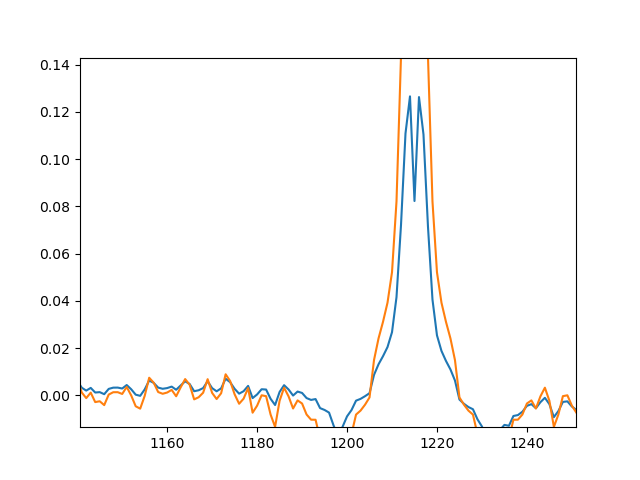

In [210]:
fig, ax = plt.subplots()
#ax.plot(gradients_all)
# ax.plot(gradient_mean)
# ax.plot(gradients_all - gradient_tot)
# ax.plot(gradient_mean - gradient_tot)
# ax.plot((np.mean(gradients_all, axis=1) - gradients_mean_rolling[buffer:-buffer]).T)

ax.plot((mean_all[buffer:-buffer] - just_mean_rolling).T)
ax.plot(zeroed)
ax.plot(just_mean_rolling)
ax.plot(mean_all[buffer:-buffer])

In [212]:
gradient_mean_under = np.mean(gradients_under, axis = 1)

<IPython.core.display.Javascript object>


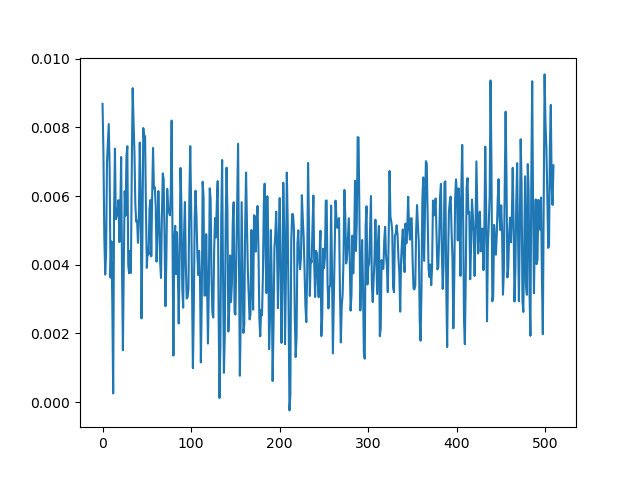

In [214]:
fig, ax = plt.subplots()
#ax.plot(gradients_all)
# ax.plot(gradient_mean)
# ax.plot(gradients_all - gradient_tot)
# ax.plot(gradient_mean - gradient_tot)
# ax.plot((np.mean(gradients_all, axis=1) - gradients_mean_rolling[buffer:-buffer]).T)

ax.plot(gradient_mean_under)

<IPython.core.display.Javascript object>


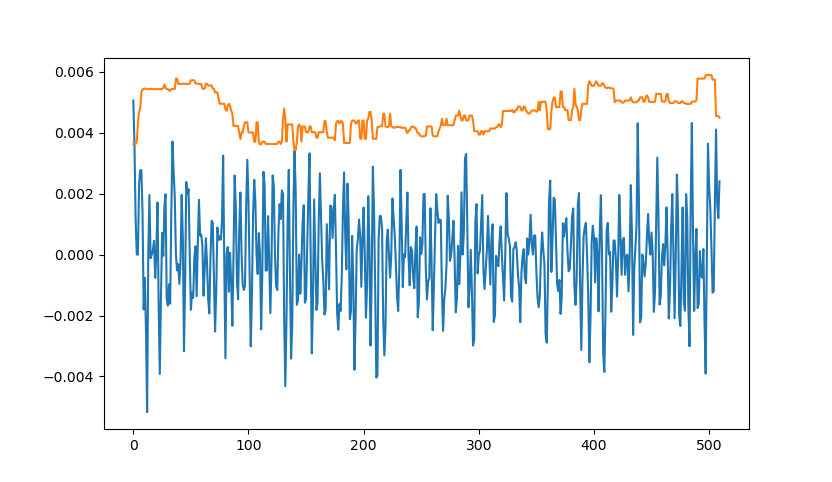

In [282]:
import scipy.signal

medfilter = scipy.signal.medfilt(gradient_mean_under, kernel_size=21)

fig, ax = plt.subplots()
#ax.plot(gradients_all)
# ax.plot(gradient_mean)
# ax.plot(gradients_all - gradient_tot)
# ax.plot(gradient_mean - gradient_tot)
# ax.plot((np.mean(gradients_all, axis=1) - gradients_mean_rolling[buffer:-buffer]).T)

ax.plot(gradient_mean_under - medfilter)
ax.plot(medfilter)

<IPython.core.display.Javascript object>


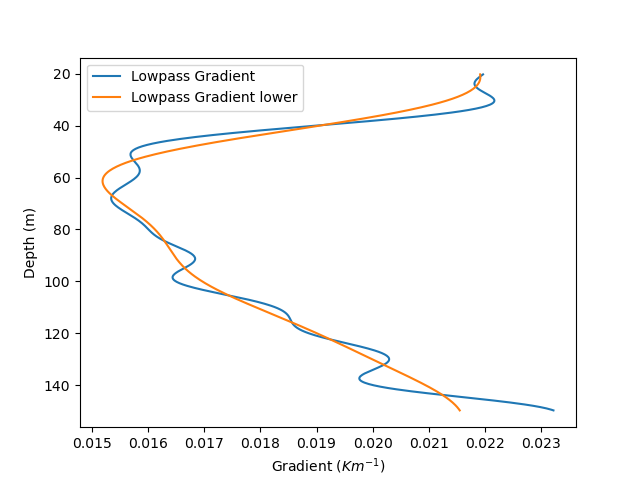

In [295]:
gradient_borehole = np.gradient(mean_tot.sel(x=slice(183,313)),.255)

b, a = signal.ellip(4, 0.01, 120, 0.020) 
fgust_grad = signal.filtfilt(b, a, gradient_borehole, method="gust")

b2, a2 = signal.ellip(4, 0.01, 120, 0.009) 
fgust_grad2 = signal.filtfilt(b2, a2, gradient_borehole, method="gust")

%matplotlib notebook
                                     
fig, ax = plt.subplots()
#plt.style.use('dark_background')
plt.gca().invert_yaxis()

ax.plot(fgust_grad, ds.sel(x=slice(183,313)).x-163, label='Lowpass Gradient')
ax.plot(fgust_grad2, ds.sel(x=slice(183,313)).x-163, label='Lowpass Gradient lower')

ax.set_xlabel('Gradient ($Km^{-1})$')
ax.set_ylabel('Depth (m)')
plt.legend()

<IPython.core.display.Javascript object>


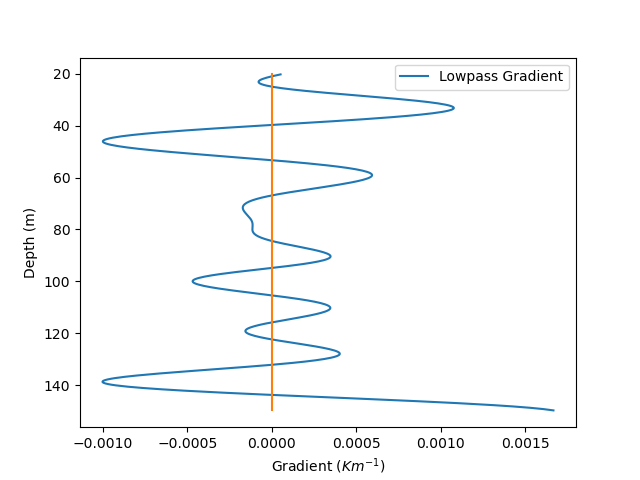

In [296]:
%matplotlib notebook
                                     
fig, ax = plt.subplots()
#plt.style.use('dark_background')
plt.gca().invert_yaxis()

ax.plot(fgust_grad-fgust_grad2, ds.sel(x=slice(183,313)).x-163, label='Lowpass Gradient')
ax.plot(np.zeros(len(ds.sel(x=slice(183,313)).x-163)),ds.sel(x=slice(183,313)).x-163)
ax.set_xlabel('Gradient ($Km^{-1})$')
ax.set_ylabel('Depth (m)')
plt.legend()

<IPython.core.display.Javascript object>


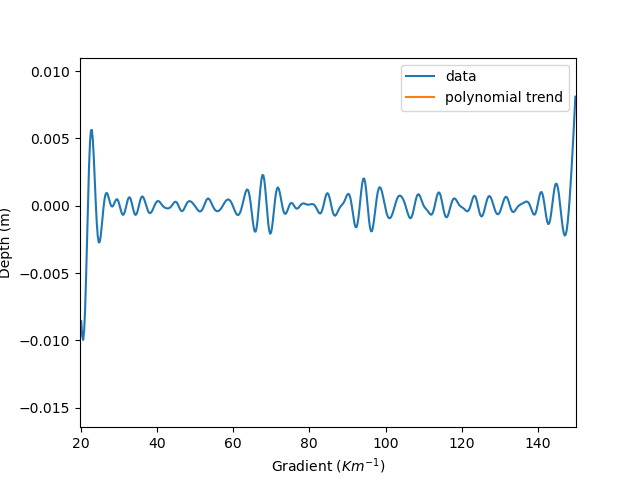

In [248]:
b, a = signal.ellip(4, 0.01, 120, 0.1) 
fgust_data = signal.filtfilt(b, a, mean_tot.sel(x=slice(183,313)), method="gust")

b2, a2 = signal.ellip(4, 0.01, 120, 0.070) 
fgust_data2 = signal.filtfilt(b2, a2, mean_tot.sel(x=slice(183,313)), method="gust")

%matplotlib notebook
                                     
fig, ax = plt.subplots()
#plt.style.use('dark_background')
#plt.gca().invert_yaxis()

ax.plot(ds.sel(x=slice(183,313)).x-163, fgust_data - fgust_data2, label='Lowpass Gradient')
ax.set_xlabel('Gradient ($Km^{-1})$')
ax.set_ylabel('Depth (m)')
plt.legend()

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
X = mean_tot.sel(x=slice(top_trend,bottom_trend)).x-start_of_borehole
X = np.asarray(X)
X = X.reshape((len(X),1))
y = mean_tot.sel(x=slice(top_trend,bottom_trend))
pf = PolynomialFeatures(degree=4)
Xp = pf.fit_transform(X)

md2 = LinearRegression()
md2.fit(Xp, y)
trendp = md2.predict(Xp)

<IPython.core.display.Javascript object>


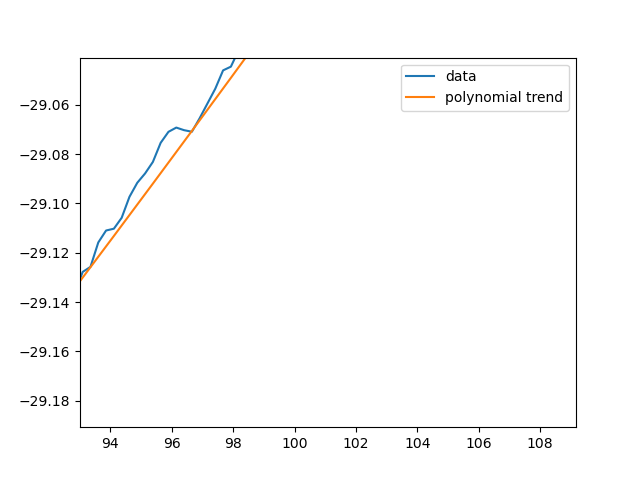

In [280]:
plt.figure()
plt.plot(X, y)
plt.plot(X, trendp)
plt.legend(['data', 'polynomial trend'])
plt.show()

<IPython.core.display.Javascript object>


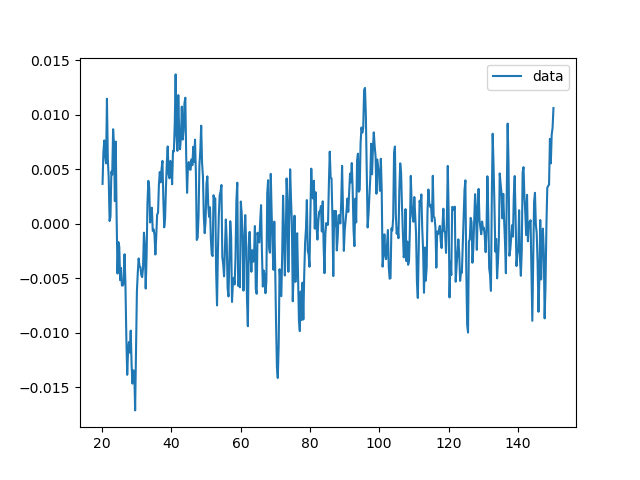

In [281]:
plt.figure()
plt.plot(X, y - trendp)
plt.legend(['data', 'polynomial trend'])
plt.show()

In [315]:
temp_anomalies[1].sel(x=slice(bottom_trend,top_trend))

<xarray.DataArray 'tmpw' (x: 513)>
dask.array<getitem, shape=(513,), dtype=float64, chunksize=(513,), chunktype=numpy.ndarray>
Coordinates:
  * x                  (x) float64 312.3 312.0 311.8 311.5 ... 182.6 182.4 182.1
    filename           <U37 'channel 1_UTC_20221215_231353.319.xml'
    filename_tstamp    int64 20221215231353319
    timeFWstart        datetime64[ns] 2022-12-15T23:28:53.657000
    timeFWend          datetime64[ns] 2022-12-15T23:43:53.657000
    timeFW             datetime64[ns] 2022-12-15T23:36:23.657000
    timeBWstart        datetime64[ns] 2022-12-15T23:43:53.657000
    timeBWend          datetime64[ns] 2022-12-15T23:58:53.657000
    timeBW             datetime64[ns] 2022-12-15T23:51:23.657000
    timestart          datetime64[ns] 2022-12-15T23:28:53.657000
    timeend            datetime64[ns] 2022-12-15T23:58:53.657000
    time               datetime64[ns] 2022-12-15T23:43:53.657000
    acquisitiontimeFW  timedelta64[ns] 00:15:00
    acquisitiontimeBW  timedelta64[ns] 00:15:00

In [316]:
sectioned_anom = []
for k,i in enumerate(temp_anomalies):
    if k % 2 ==0:
        data = np.asarray(i.sel(x=slice(top_trend,bottom_trend)))
    else:
        data = np.asarray(i.sel(x=slice(bottom_trend,top_trend)))
    sectioned_anom.append(data)

<IPython.core.display.Javascript object>


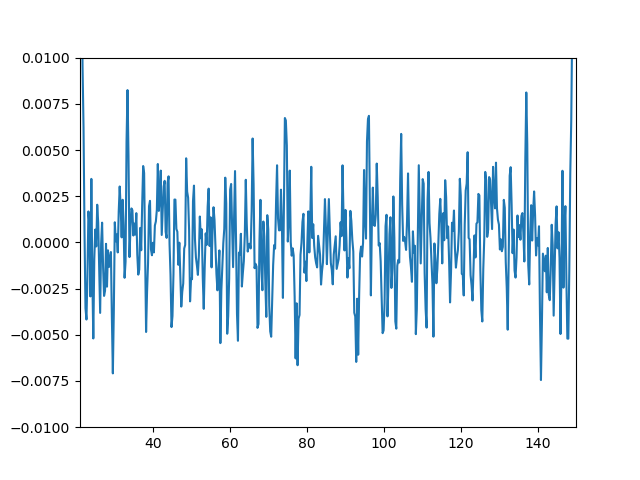

In [326]:
plt.figure()
plt.plot(temp_anomalies[0].sel(x=slice(top_trend,bottom_trend)).x - start_of_borehole, np.mean(np.asarray(sectioned_anom), axis=0))
plt.xlim([21,150])
plt.ylim([-0.01,0.01])
plt.show()

<IPython.core.display.Javascript object>


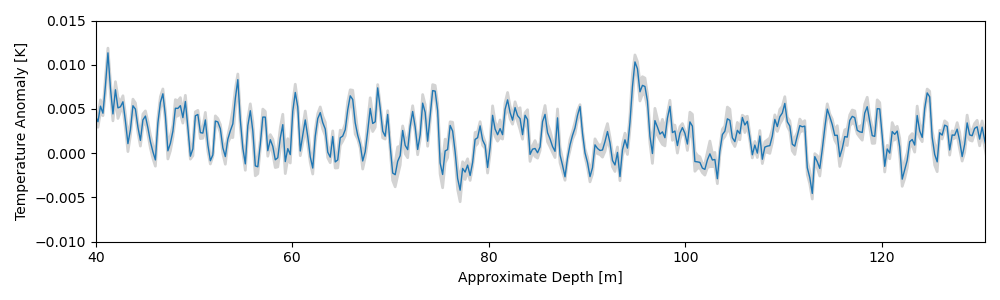

In [371]:
t_dis = 2.571
mean_anomaly = np.mean(np.asarray(temp_anomalies).T, axis=1)
std_anomaly = np.std(np.asarray(temp_anomalies).T, axis=1) / (np.sqrt(6) *t_dis)

plt.figure(figsize = [10,3])
plt.fill_between(temp_anomalies[0].x - start_of_borehole,  
                 mean_anomaly + std_anomaly, 
                 mean_anomaly - std_anomaly, 
                 color='lightgrey', 
                 lw = 2)
plt.plot(temp_anomalies[0].x - start_of_borehole,mean_anomaly, lw=1)
# plt.plot(temp_anomalies[0].x - start_of_borehole, mean_anomaly + std_anomaly, )
# plt.plot(temp_anomalies[0].x - start_of_borehole, mean_anomaly - std_anomaly)

plt.xlabel('Approximate Depth [m]')
plt.ylabel('Temperature Anomaly [K]')
plt.xlim([top_trend- start_of_borehole +20,bottom_trend- start_of_borehole - 20])
plt.ylim([-0.01,0.015])
plt.tight_layout()
plt.savefig('Temperature_Anomaly.png', dpi=300)
